___
# Distribuições Exponenciais

**Objetivo: ao fim desta aula, o aluno será capaz de decidir pela aplicação de distribuições exponenciais fenômenos reais**

In [26]:
import numpy as np
import math
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt


## Teoria: a distribuição exponencial

Já conhecemos a distribuição Binomial. Ela acontece quando realizamos experimentos independentes com probabilidade $p$ de sucesso, e queremos saber a probabilidade de encontrar $k$ sucessos em $n$ execuções do experimento. Por exemplo, podemos estimar a probabilidade de ganhar $k$ partidas em $n$ jogos.

Em algumas situações, nosso número $n$ de experimentos é muito grande e a probabilidade $p$ tende a zero, como se estivéssemos executando situações binomiais ao longo de um contínuo. Nesse caso, aparece uma distribuição de Poisson com parâmetro $\lambda$ igual ao número de ocorrências de um evento ao longo de um intervalo contínuo conhecido. Por exemplo, podemos usar a distribuição Poisson para estimar a probabilidade de termos mais de 5 gols em uma partida de futebol.

Agora, temos um outro caso. Estamos numa situação modelada por um processo de Poisson, e queremos saber o tempo que devemos esperar até o próximo evento - por exemplo, quanto tempo devemos esperar até o próximo gol. O tempo que leva até o próximo evento é modelado por uma distribuição exponencial com média $\mu=1/\lambda$, onde $\lambda$ é o mesmo que veio da distribuição Poisson correspondente.

# Exercício 1
*Objetivo: modelar um processo usando uma distribuição exponencial e calcular seu valor esperado*

De acordo com o site [SoccerStats](https://www.soccerstats.com/latest.asp?league=brazil), o primeiro gol de uma partida é marcado, em média, aos 33min do primeiro tempo. Essa é uma média que vale para todos os times que disputam a série A do campeonato brasileiro, isto é, não é uma estatística somente do Corinthians.

Porém, vimos que os jogos do Corinthians tipicamente têm 3 gols.

1. Qual é o parâmetro $\lambda$ da distribuição Poisson que modela o número de gols em um jogo do Corinthians?
2. Se o número de gols do Corinthians (por minuto ou por partida) segue uma distribuição de Poisson (como vimos acima), qual deve ser o tipo de distribuição (e sua média) que modela o tempo em que o primeiro gol é marcado?
3. Usando essa distribuição, estime em que momento, em média, o primeiro gol de uma partida do Corinthians (favorável ou contrário) é marcado (dica: use `st.expon.mean`). O valor informado pelo SoccerStats está a menos de um desvio padrão deste valor? (dica: `st.expon.std`).

In [27]:
# Nesse exercício você só precisa descomentar as linhas abaixo e modificar/interpretar o que achar necessário
import scipy.stats as st
N_gols = 3 # numero medio de gols por partida do Corinthians 
T = 90 # Duração média da partida (minutos)
L = N_gols # Troque para calcularmos o número de gols por minuto, e não o número de gols por partida
mu = 1/L
print(st.expon.mean(scale=mu)) # Se Poisson nos dá gols por minuto, a exponencial correspondente nos dá minutos por gol
print(st.expon.std(scale=mu)) 

0.3333333333333333
0.3333333333333333


# Teoria: Da PMF para a PDF

A distribuição exponencial está num domínio contínuo. Isso se opõe à Binomial ou a Poisson, em que poderíamos calcular a probabilidade de nosso resultado ser, por exemplo, exatamente igual a 10. Numa distribuição contínua, podemos calcular a probabilidade de nosso resultado ser qualquer número real (no domínio da função, é claro).

Isso tem uma implicação interessante: como há infinitas possibilidades para o resultado do experimento, a probabilidade de cada um deles é $1/\infty = 0$. Por isso, não temos mais uma função de massa de probabilidade (PMF), e sim uma função de *densidade* de probabilidade (PDF). A PDF indica que há mais probabilidade em uma região, mas não significa que a probabilidade de um resultado do experimento é exatamente aquele.

Para calcular probabilidades, vamos usar a CDF.

A *cdf* é uma soma ao longo de uma curva contínua, isto é, uma integral. Em geral, usamos $P(X \leq x)$ para representar a *cdf* e essa função que foi integrada chama-se *função densidade de probabilidade* (*pdf*). É importante lembrar que:

$$
P(X \leq x) = \int_{-\infty}^x p(X) dX
$$

e, portanto,

$$
p(X) = \frac{dP(x)}{dx}
$$

Veja como a PDF e a CDF da distribuição exponencial se parecem:

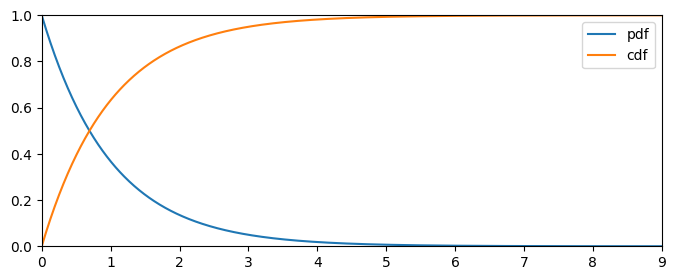

In [28]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

x = np.linspace(0,9,1000)
mu = 1
plt.figure(figsize=(8,3))
plt.plot(x,st.expon.pdf(x, scale=mu), label='pdf')
plt.plot(x,st.expon.cdf(x, scale=mu), label='cdf')
plt.ylim([0,1])
plt.xlim([0,x[-1]])
plt.legend()
plt.show()

# Exercício 2
*Objetivo: usar a CDF para calcular probabilidades no caso contínuo*

Assumindo uma distribuição exponencial com $\mu=2$, calcule:

1. $P(X\leq 2)$
1. $P(X \geq 2)$
1. $P(X \geq 2 \cap X \leq 5)$
1.  $P(X \geq 2 | X \leq 5)$
1. $P(X \geq 4 | X \geq 2)$ (compare com o resultado da 2)
1. $P(X = 2)$

In [29]:
import scipy.stats as st
mu = 7
# 1 (exemplo, mas modifique isso):
p1 = st.expon.cdf(2, scale=mu)
print(p1)
# 2 (exemplo. Por que isso é diferente de quando fazíamos essa operação na Binomial?)
p2 = 1-st.expon.cdf(2, scale=mu)
print(p2)

0.24852270692471404
0.751477293075286


# Teoria (é a última!)

As distribuições exponenciais podem ser usadas em várias situações em que os modelos Poisson também seriam aplicáveis. Por exemplo, se Poisson pode modelar o número de clientes que chegam em uma loja em um intervalo de tempo, a exponencial correspondente pode modelar o tempo que leva até o próximo cliente chegar. Uma das aplicações da distribuição Poisson é modelar a ocorrência de terremotos - e, portanto, a distribuição exponencial correspondente modela o tempo que leva até o próximo terremoto.

Os dados que usaremos foram pré-processados de um dataset que tem as datas de diversos desastres naturais reais ao longo do mundo. Os dados e o algoritmo de pré-processamento podem ser encontrados [aqui](https://www.kaggle.com/tiagoft/earthquakes-in-japan). Os dados da tabela `indonesia.csv` contém uma linha para cada terremoto na Indonésia desde 1975, e há duas colunas:

* `Date`, com a data do terremoto, e
* `Interval`, com o tempo em dias desde o terremoto anterior

# Exercício 3
*Objetivo: encontrar o parâmetro $\mu$ de uma distribuição exponencial*

O parâmetro $\mu$ pode ser entendido como o tempo de espera médio entre dois eventos. Encontre $\mu$ para os dados de terremotos da Indonésia.

In [30]:
import pandas as pd
df = pd.read_csv('dados/desastres/indonesia.csv')
df.head()


,Date,Interval
0,1976-07-14,18.0
1,1976-10-29,107.0
2,1977-08-19,294.0
3,1977-08-27,8.0
4,1979-05-30,641.0


# Exercício 4
*Objetivo: verificar se dados são bem explicáveis por uma distribuição exponencial*

Usando um QQ-Plot, verifique se é realmente razoável supor que os intervalos entre terremotos seguem uma distribuição exponencial.




# Exercício 5
*Objetivo: manipular dados e amostras de distribuições exponenciais*

1. À partir dos *dados*, calcule a probabilidade de o intervalo entre dois terremotos subsequentes ser igual ou maior a 10 dias.
1. Calcule essa mesma probabilidade, mas agora à partir do modelo.
1. Sabendo que já passaram 50 dias desde o último terremoto, use o modelo para descobrir a probabilidade de o próximo terremoto ser mais de 10 dias adiante.

# Exercício 6
*Objetivo: verificar se exponenciais servem para qualquer desastre natural*

A tabela `brazil.csv` tem dados semelhantes aos de terremotos na Indonésia, mas relacionados a tempestades no Brasil. Usando o procedimento que fizemos com o QQ-Plot:

1. Decida se é razoável modelar tempestades no Brasil usando exponenciais,
1. Justifique a diferença dos resultados, pensando na forma que terremotos surgem e na forma que tempestades surgem. Quais premissas das distribuições Poisson/Exponencial são violadas no caso das tempestades?

In [31]:
import pandas as pd
df = pd.read_csv('dados/desastres/brazil.csv')
df.head()

,Date,Interval
0,1984-10-09,1567.0
1,1985-09-30,356.0
2,1989-07-29,1398.0
3,1994-05-15,1751.0
4,1994-05-15,0.0
